In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn import preprocessing
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r"C:\Users\Lina\OneDrive - Sup'Biotech\BT4\ESME\Projet\Metabolic_Syndrom_Project\Metabolic Syndrome.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [4]:
df.shape

(2401, 15)

In [5]:
df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

## Metabolic syndrom

In [6]:
sex_colors = {'Male':'#377eb8', 'Female':'#f781bf'}
marital_colors = {'Separated':'#50b131', 'Divorced':'#bb9832', 'Widowed':'#36ada4', 'Single':'#e866f4', 'Married':'#f77189'}
race_colors = {'White':'#66c2a5', 'Black':'#fc8d62', 'Asian':'#8da0cb', 'MexAmerican':'#e78ac3', 'Hispanic':'#a6d854', 'Other':'#b3b3b3'}

In [7]:
def check_met(value):
    if value == 1:
        return 'Metabolic Syndrome'
    else:
        return 'Healthy'

df['Metabolic_Dist'] = df['MetabolicSyndrome'].apply(check_met)

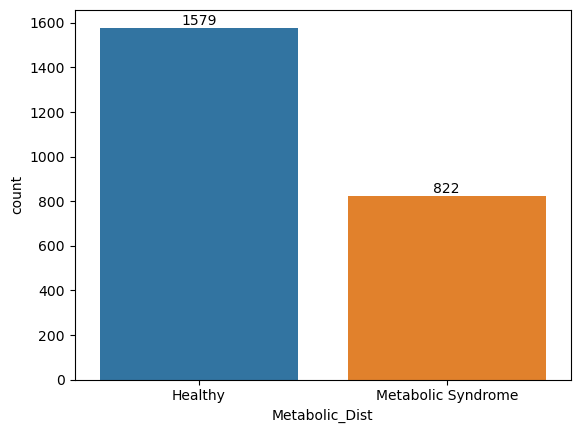

In [8]:
met_dist = sns.countplot(df, x = 'Metabolic_Dist')

counts = df['Metabolic_Dist'].value_counts()

for i, count in enumerate(counts):
    met_dist.text(i, count, str(count), ha='center', va='bottom')


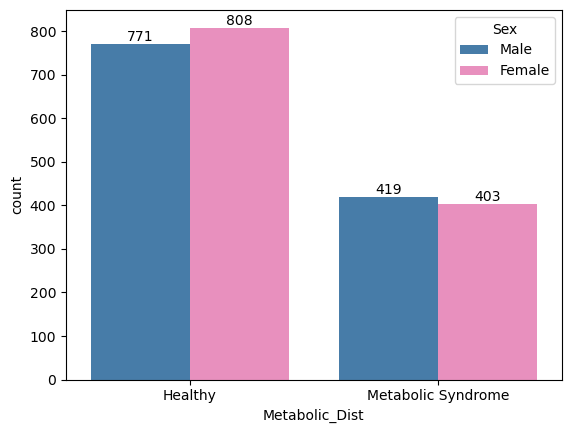

In [9]:
met_sex = sns.countplot(df, x = 'Metabolic_Dist', hue = 'Sex', palette = sex_colors)

for p in met_sex.patches:
    met_sex.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 5), 
                     textcoords = 'offset points')

In [10]:
df['Sex'] = df['Sex'].astype('string').fillna('NaN')
df['Marital'] = df['Marital'].astype('string').fillna('NaN')
df['Race'] = df['Race'].astype('string').fillna('NaN')

fig = px.sunburst(df, path = ['Sex', 'Marital', 'Race'], color = 'Sex', color_discrete_map = sex_colors)
fig.update_traces(textinfo = "label + value")

fig.update_layout(autosize=False, width=1000,height=800)

In [19]:
def kde_boxplot(df,df_col):
    for col in df_col:
        fig, axes = plt.subplots(1, 2, figsize=(18, 5))
        
        sns.histplot(df, x = col, hue = 'Metabolic_Dist', kde = True, multiple="stack", ax=axes[0])
        
        sns.boxplot(df, y = 'Sex', x = col, hue = 'Metabolic_Dist', ax=axes[1])
        
        fig.suptitle(f'Numeric Feature : {col}', fontsize=16, fontweight='bold')
        fig.subplots_adjust(wspace=0.2)
        plt.show()

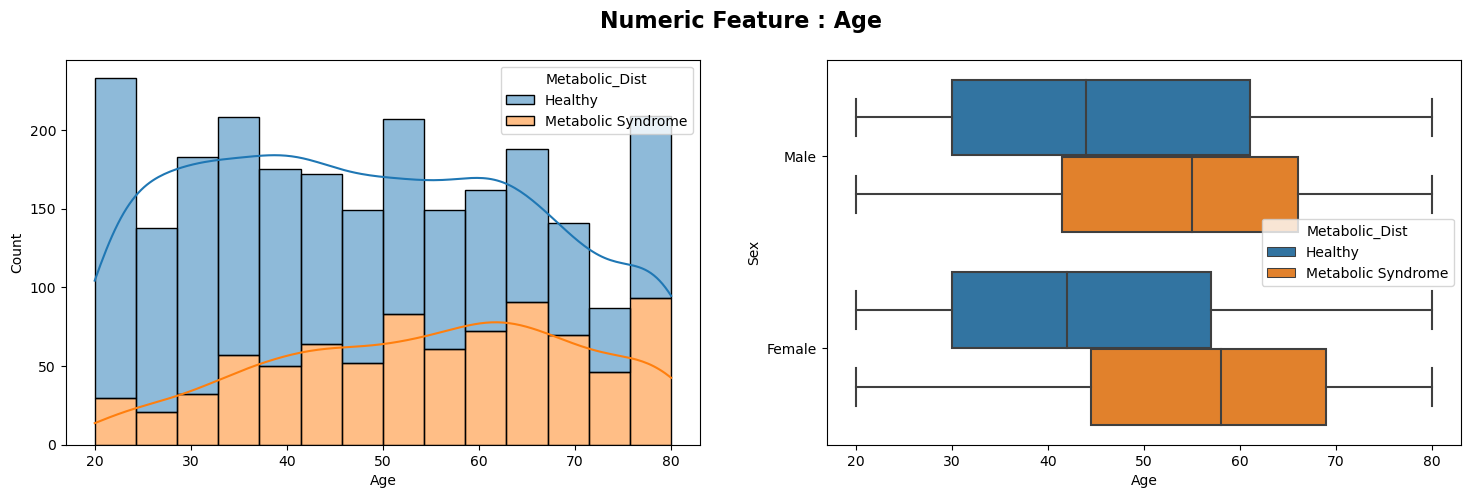

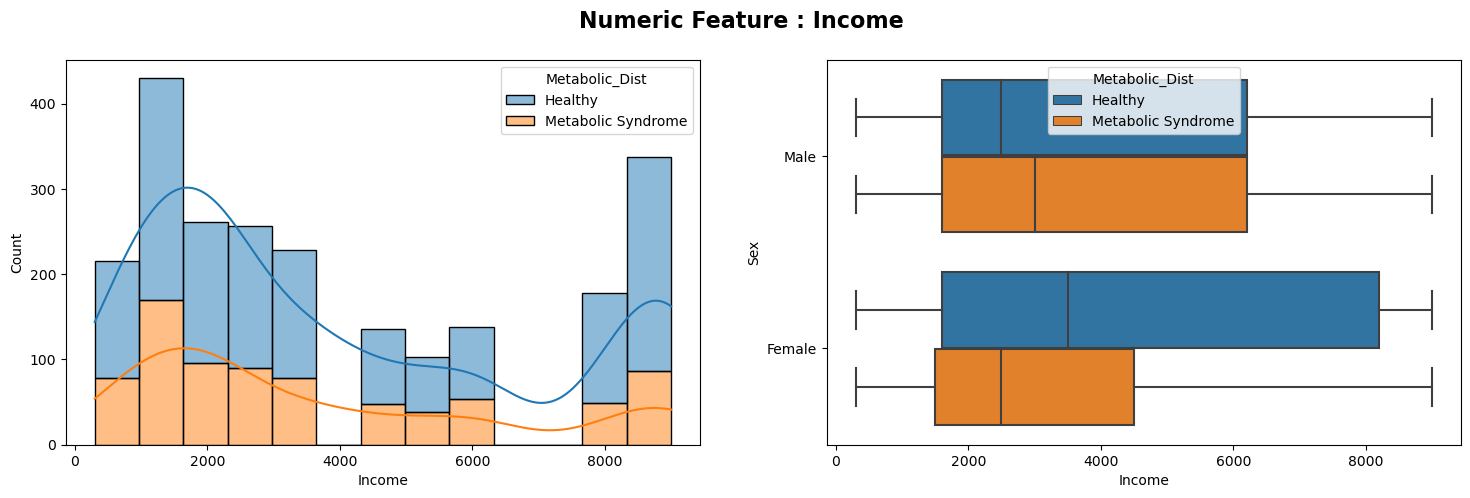

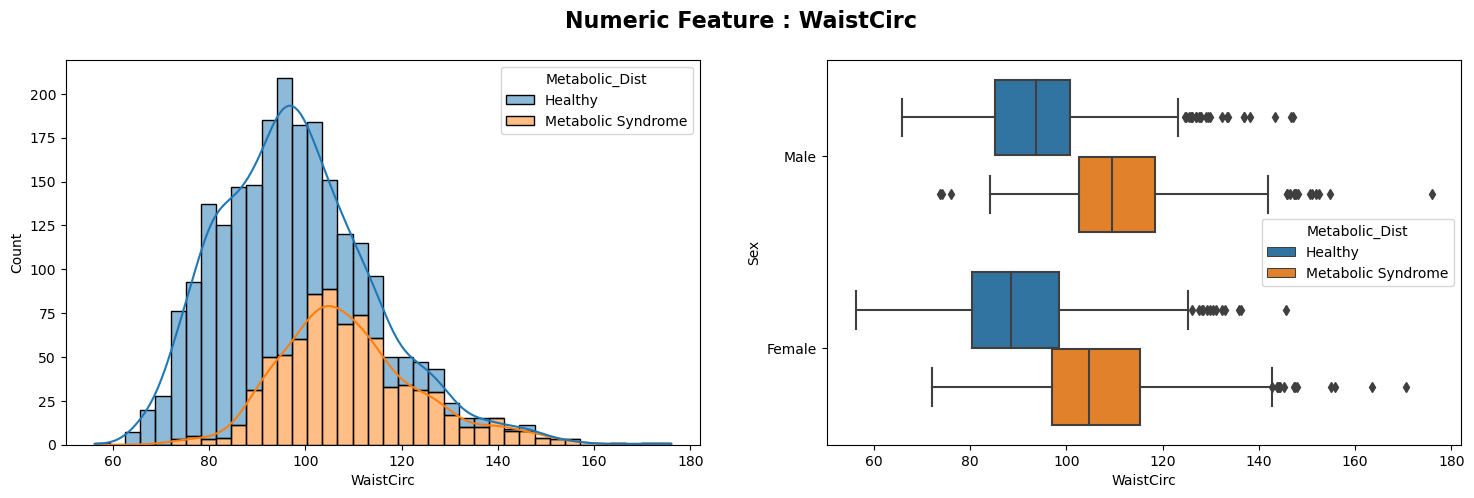

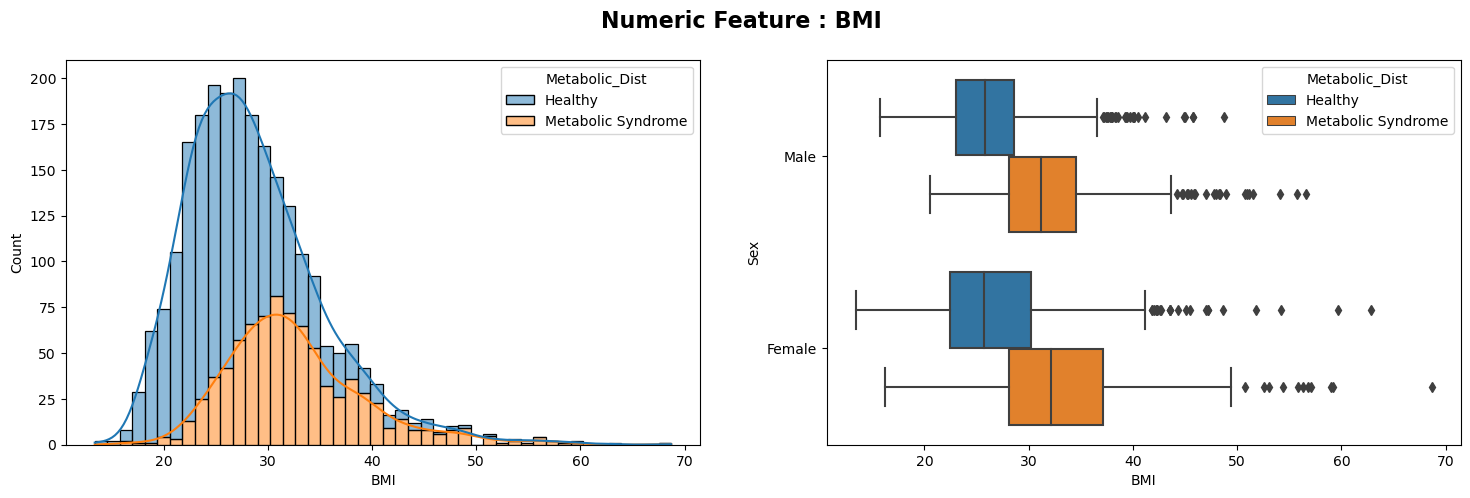

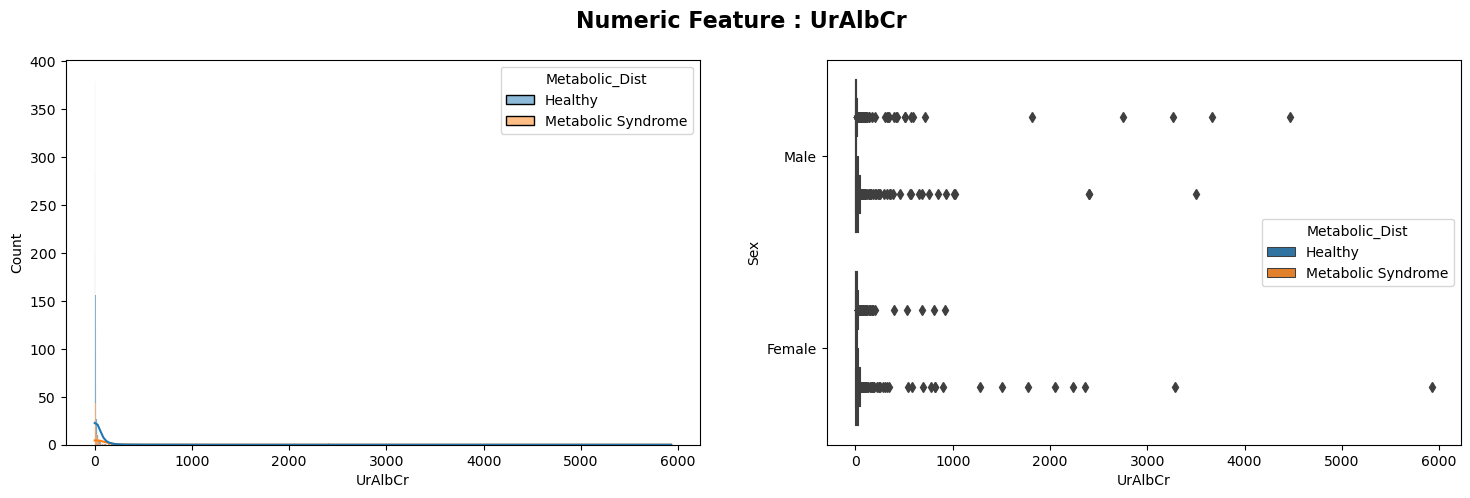

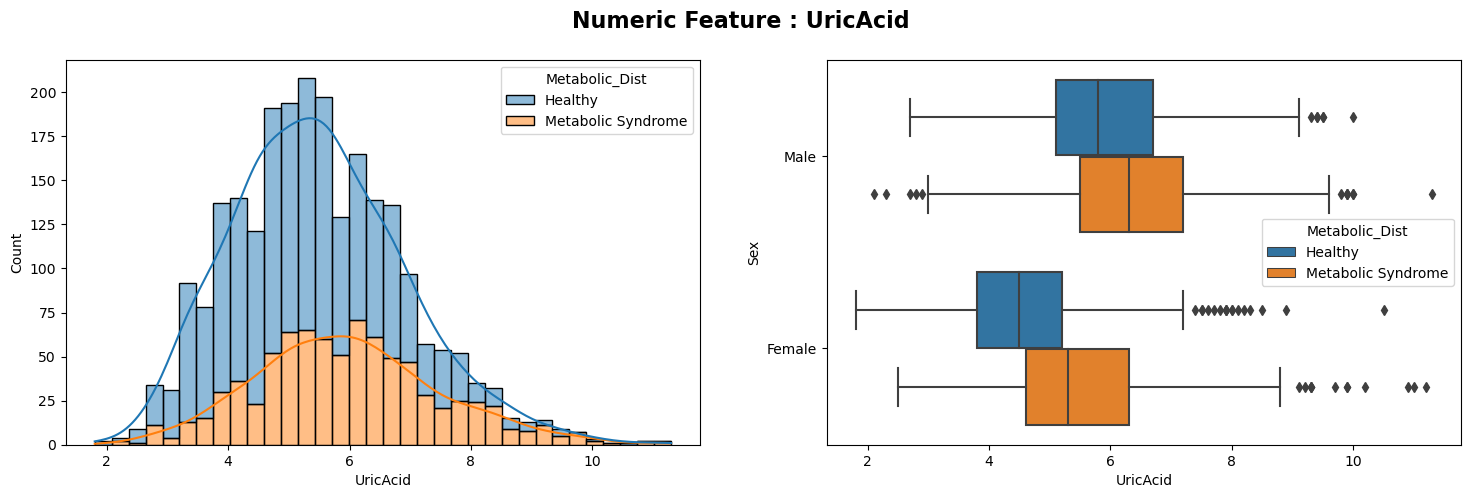

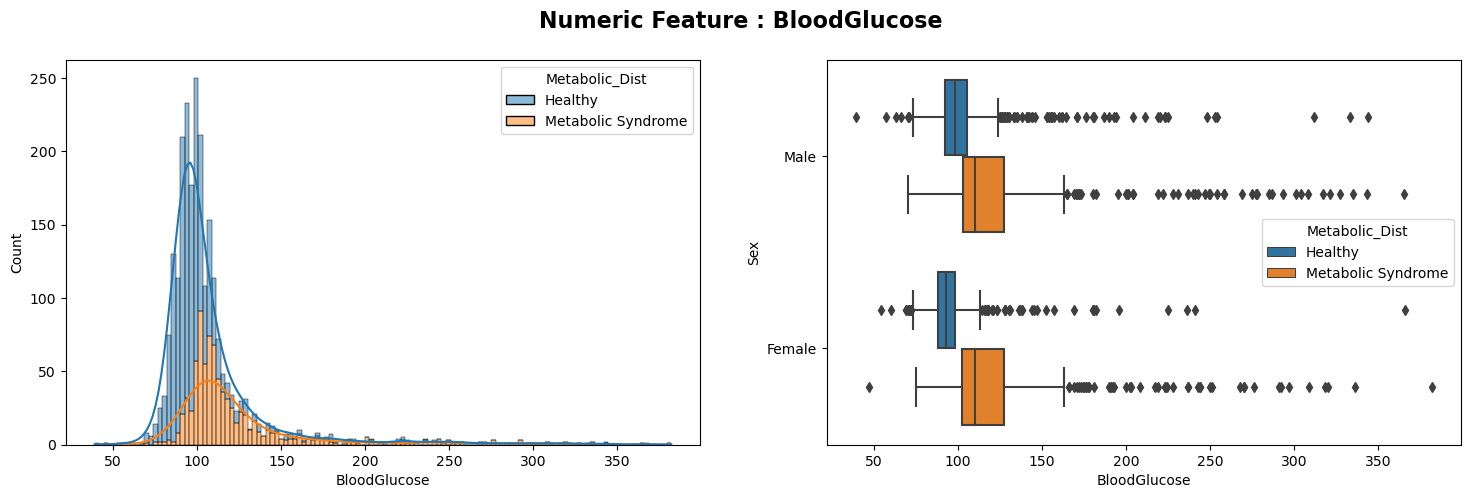

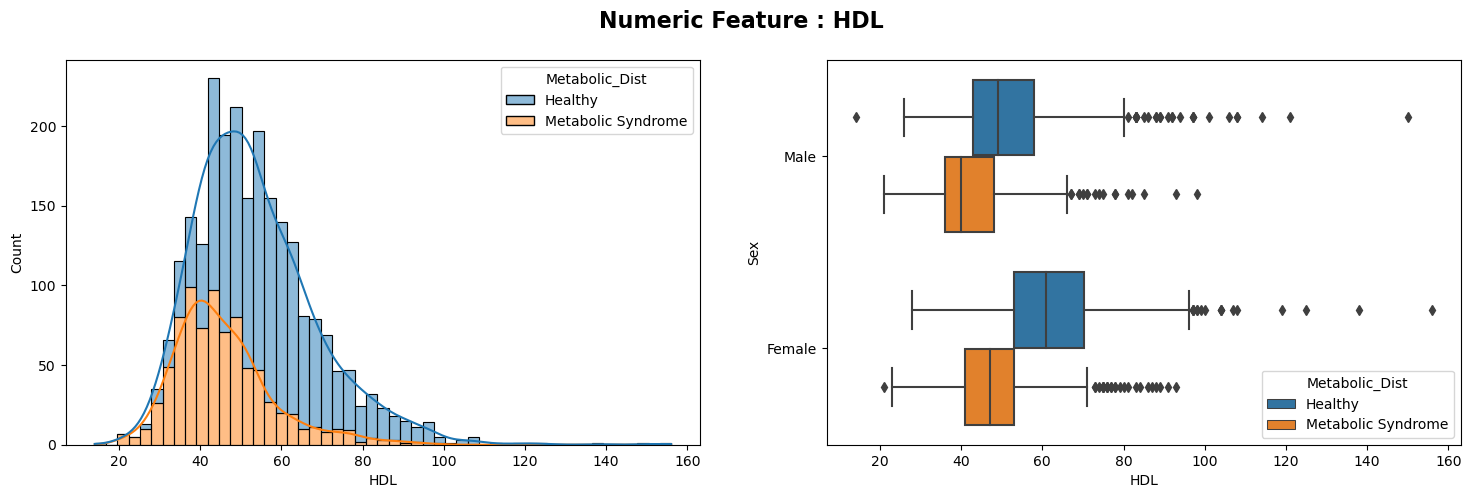

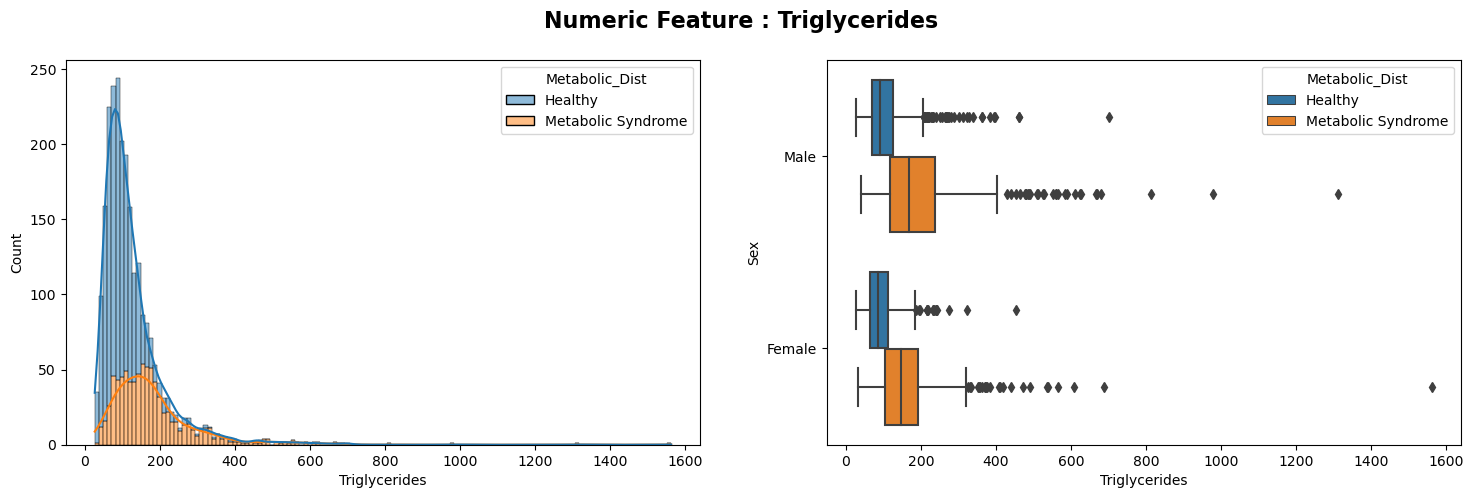

In [20]:
df_col=df.drop(columns=["seqn",'Albuminuria','MetabolicSyndrome']).select_dtypes("number")

kde_boxplot(df,df_col)

C:\Users\Lina\AppData\Local\Temp\ipykernel_23976\160153211.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

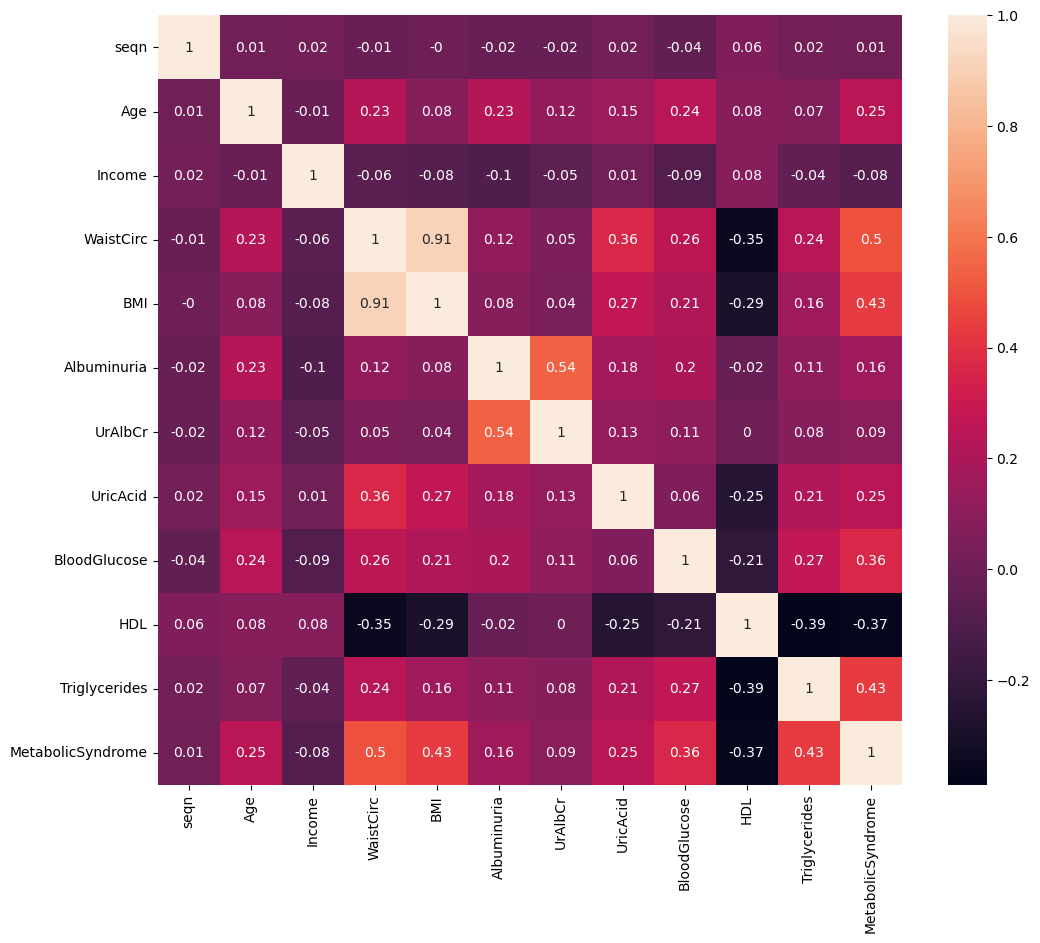

In [13]:
corr_matrix = df.corr().round(2)
plt.figure(figsize = (12,10))

sns.heatmap(corr_matrix, annot = True)

strong correlation between the BMI and WaistCirc

### BMI

In [14]:
fig = px.box(df, x="Sex", y="BMI", facet_col='Metabolic_Dist', color = 'Sex', color_discrete_map = sex_colors)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_layout(autosize=False, width=800,height=600)

In [15]:
fig = px.box(df, x="Sex", y="BMI", facet_col='Metabolic_Dist', color = 'Marital', color_discrete_map = marital_colors)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_layout(autosize=False, width=900,height=600)

In [16]:
fig = px.box(df, x="Sex", y="BMI", facet_col='Metabolic_Dist', color = 'Race', color_discrete_map = race_colors)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_layout(autosize=False, width=900,height=600)

### Age

In [17]:
fig = px.scatter(df, x="Age", y="BMI", color="Sex", color_discrete_map = sex_colors, facet_col='Metabolic_Dist', size_max=60)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_layout(autosize=False, width=700,height=500)